# Example for using fleet modeling in AeroMAPS

This notebook aims at using the classes dedicated to the fleet modelling that are used in AeroMAPS.

## Link with other AeroMAPS models

This fleet model can be used in AeroMAPS for improving the modeling of the fleet efficiency. For this purpose, a dedicated model is loaded, based on the bottom-up approach using fleet model. It replaces the basic top-down approach for modeling the evolution of the fleet efficiency, based on annual efficiency gains.

In [1]:
%matplotlib widget
from aeromaps.core.process import AeromapsProcess
from aeromaps.core.models import models_complex

Here, an example using the previous fleet generated is performed with the AeroMAPS default float inputs. The hydrogen used for hydrogen aircraft is assumed to be produced via electrolysis using dedicated low-carbon electricity.

In [2]:
process = AeromapsProcess(read_json=True, models=models_complex, fleet=True)

In [3]:
# Air traffic evolution

## Growth rate by category and decade [%]
process.parameters.growth_rate_2020_2030_short_range = 3
process.parameters.growth_rate_2030_2040_short_range = 3
process.parameters.growth_rate_2040_2050_short_range = 3
process.parameters.growth_rate_2020_2030_medium_range = 3
process.parameters.growth_rate_2030_2040_medium_range = 3
process.parameters.growth_rate_2040_2050_medium_range = 3
process.parameters.growth_rate_2020_2030_long_range = 3
process.parameters.growth_rate_2030_2040_long_range = 3
process.parameters.growth_rate_2040_2050_long_range = 3
process.parameters.growth_rate_2020_2030_freight = 3
process.parameters.growth_rate_2030_2040_freight = 3
process.parameters.growth_rate_2040_2050_freight = 3

In [4]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 89  # 2019 value: 82.399312

In [5]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [6]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12
process.parameters.crops_biomass = 63
process.parameters.forest_residues_biomass = 17
process.parameters.agricultural_residues_biomass = 57
process.parameters.algae_biomass = 15
process.parameters.available_electricity = 250.0

In [7]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1



In [8]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix by decade (the rest being supplemented by kerosene) [%]

# REFUELEU LIKE

process.parameters.biofuel_share_2030 = 4.8
process.parameters.biofuel_share_2040 = 24.0
process.parameters.biofuel_share_2050 = 35.0
process.parameters.electrofuel_share_2030 = 1.2
process.parameters.electrofuel_share_2040 = 10.0
process.parameters.electrofuel_share_2050 = 35.0



In [9]:
# Various environmental settings

## Share of biofuel production pathways by decade (the rest being completed by AtJ processes) [%]
# REFUELEU LIKE
process.parameters.biofuel_hefa_fog_share_2030 = 0.7
process.parameters.biofuel_hefa_fog_share_2040 = 0.7
process.parameters.biofuel_hefa_fog_share_2050 = 0.7
process.parameters.biofuel_hefa_others_share_2030 = 3.8
process.parameters.biofuel_hefa_others_share_2040 = 3.8
process.parameters.biofuel_hefa_others_share_2050 = 3.8
process.parameters.biofuel_ft_others_share_2030 = 76.3
process.parameters.biofuel_ft_others_share_2040 = 76.3
process.parameters.biofuel_ft_others_share_2050 = 76.3
process.parameters.biofuel_ft_msw_share_2030 = 7.4
process.parameters.biofuel_ft_msw_share_2040 = 7.4
process.parameters.biofuel_ft_msw_share_2050 = 7.4


## Emission factors for electricity by decade (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_2020 = 429
process.parameters.electricity_emission_factor_2030 = 200
process.parameters.electricity_emission_factor_2040 = 100
process.parameters.electricity_emission_factor_2050 = 30

## Share of hydrogen production pathways by decade (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_2030 = 100
process.parameters.hydrogen_electrolysis_share_2040 = 100
process.parameters.hydrogen_electrolysis_share_2050 = 100
process.parameters.hydrogen_gas_ccs_share_2030 = 0
process.parameters.hydrogen_gas_ccs_share_2040 = 0
process.parameters.hydrogen_gas_ccs_share_2050 = 0
process.parameters.hydrogen_coal_ccs_share_2030 = 0
process.parameters.hydrogen_coal_ccs_share_2040 = 0
process.parameters.hydrogen_coal_ccs_share_2050 = 0
process.parameters.hydrogen_gas_share_2030 = 0
process.parameters.hydrogen_gas_share_2040 = 0
process.parameters.hydrogen_gas_share_2050 = 0

In [10]:
# process.parameters.covid_start_year: int = 2020
# process.parameters.covid_rpk_drop_start_year: float = 0.0  # [%]
# process.parameters.covid_end_year: int = 2024
# process.parameters.covid_end_year_reference_rpk_ratio: float = 112.0  # [%]
# process.parameters.covid_load_factor_2020: float = 83.2  # [%]
# process.parameters.covid_energy_intensity_per_ask_increase_2020: float = 0.0  # [%]

## Load and process

In [11]:
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

The fleet is divided into three main categories of aircraft, associated to an initial subcategory based on representative aircraft:
- Short range (Conventional narrow-body)
- Medium range (Conventional narrow-body)
- Long range (Conventional wide-body)

Lets now assemble these categories into a fleet object. By default, two new aircraft have been added to the initial subcategories, and two subcategories have also been added for Short Range (turboprop aircraft and hydrogen aircraft). Illustrative values are considered.

In [12]:
fleet = process.fleet
fleet_model = process.fleet_model

## Set up the fleet

A dedicated user interface can be used for modifying the fleet using the following command. The can then directly change the future composition of the fleet by simply adding subcategories and aircraft. For subcategories, the final distribution between the different subcategories among a category has to be indicated. For aircraft, the user can choose an Entry-Into-Service year as well as the type of fuel used (DROP_IN_FUEL or HYDROGEN). The gains in terms of fuel consumption, NOx emission index and soot emission index, in comparison to the recent reference aircraft in the initial subcategory, also have to be specified. Negative values can be considered, meaning an increase in fuel consumption for instance.

In [13]:
fleet.ui

You can change fleet renewal rates for each category. The default value is 25 years.

In [20]:
fleet.categories["Short Range"].parameters.life = 25
fleet.categories["Medium Range"].parameters.life = 25
fleet.categories["Long Range"].parameters.life = 25

In [23]:
import numpy as np

datastorage_co2=[]
datastorage_final_co2=[]
datastorage_energy=[]

categories = list(fleet_model.fleet.categories.values())
for year in range(2025,2046):
    for val in range(61):
        for i, category in enumerate(categories):
            for j, subcategory in category.subcategories.items():
                for aircraft in subcategory.aircraft.values():
                    if aircraft.energy_type=='DROP_IN_FUEL':
                        aircraft.parameters.consumption_gain=str(val)
                        aircraft.parameters.entry_into_service_year=str(year)
        fleet_model.compute()
        process.compute()
        # datastorage_co2.append([year, val, process.data['vector_outputs']['cumulative_co2_emissions'][2050]])
        datastorage_energy.append([year, val, process.data['vector_outputs'].loc[2020:2050,'energy_consumption'].sum()])


In [24]:
# pd.DataFrame(datastorage_final_co2).to_csv('25_years_final_co2.csv')
pd.DataFrame(datastorage_energy).to_csv('25_years_energy.csv')

## Compute and results for the fleet model

Once the fleet has been chosen, the user can compute.

In [52]:
fleet_model.compute()

In [53]:
process.compute()

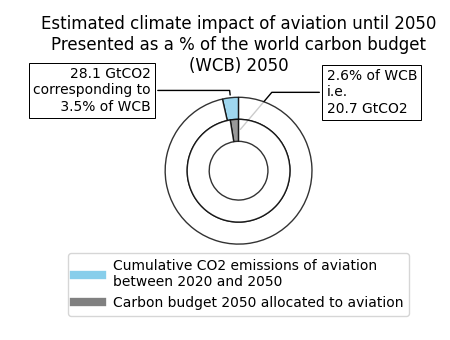

In [30]:
process.plot('carbon_budget_assessment')

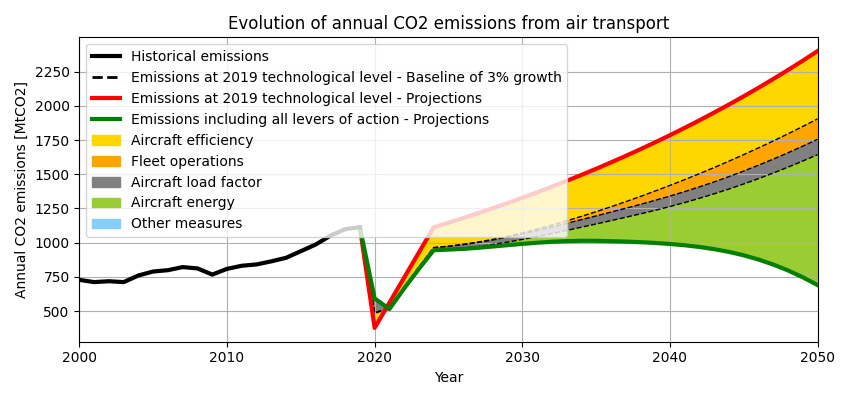

In [31]:
process.plot('air_transport_co2_emissions')

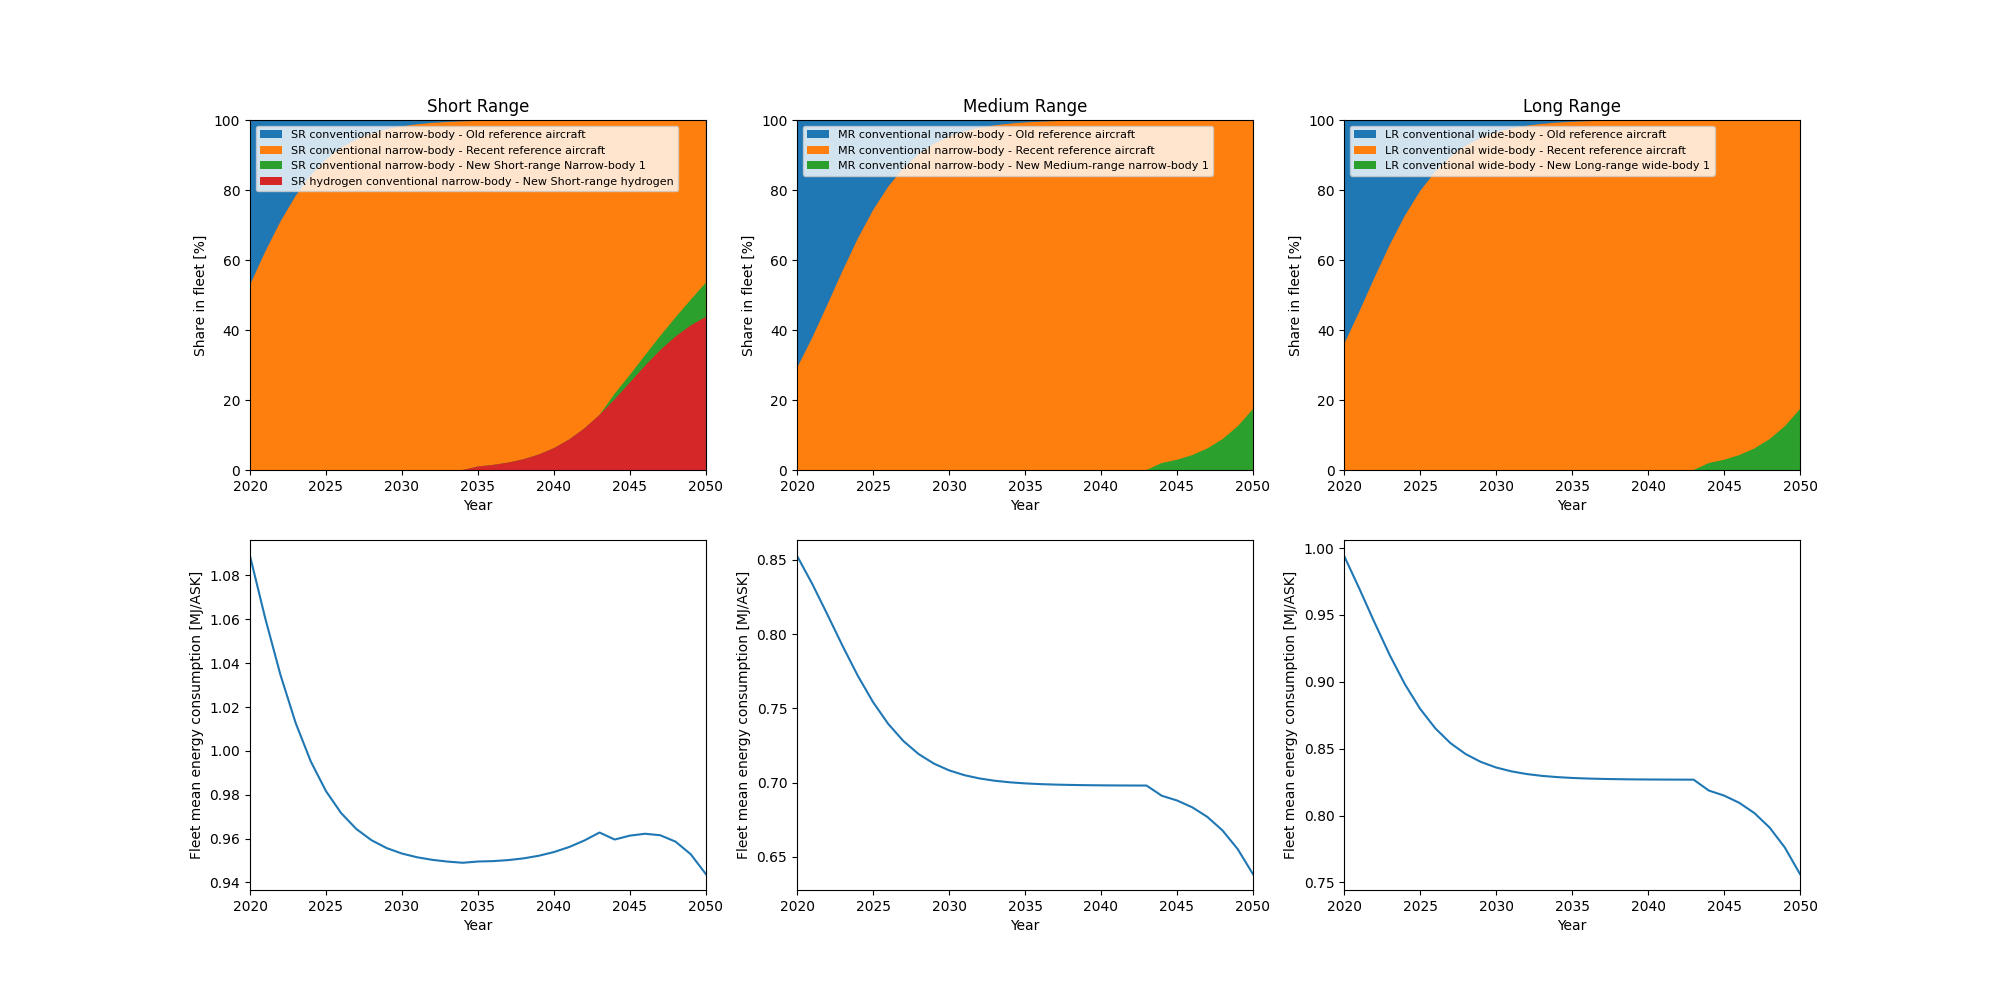

In [193]:
fleet_model.plot()


In [26]:
fleet_model.df

,Short Range:SR hydrogen conventional narrow-body:New Short-range hydrogen:single_aircraft_share,Short Range:SR conventional narrow-body:recent_reference:single_aircraft_share,Short Range:SR conventional narrow-body:old_reference:single_aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 1:single_aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:old_reference:single_aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 1:single_aircraft_share,Long Range:LR conventional wide-body:recent_reference:single_aircraft_share,Long Range:LR conventional wide-body:old_reference:single_aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 1:single_aircraft_share,Short Range:SR hydrogen conventional narrow-body:New Short-range hydrogen:aircraft_share,Short Range:SR conventional narrow-body:New Short-range Narrow-body 1:aircraft_share,Short Range:SR conventional narrow-body:recent_reference:aircraft_share,Short Range:SR conventional narrow-body:old_reference:aircraft_share,Medium Range:MR conventional narrow-body:New Medium-range narrow-body 1:aircraft_share,Medium Range:MR conventional narrow-body:recent_reference:aircraft_share,Medium Range:MR conventional narrow-body:old_reference:aircraft_share,Long Range:LR conventional wide-body:New Long-range wide-body 1:aircraft_share,Long Range:LR conventional wide-body:recent_reference:aircraft_share,Long Range:LR conventional wide-body:old_reference:aircraft_share,Short Range:SR conventional narrow-body:energy_consumption,Short Range:SR conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR conventional narrow-body:energy_consumption:hydrogen,Short Range:SR conventional narrow-body:share:total,Short Range:SR conventional narrow-body:share:dropin_fuel,Short Range:SR conventional narrow-body:share:hydrogen,Short Range:share:dropin_fuel,Short Range:share:hydrogen,Short Range:SR hydrogen conventional narrow-body:energy_consumption,Short Range:SR hydrogen conventional narrow-body:energy_consumption:dropin_fuel,Short Range:SR hydrogen conventional narrow-body:energy_consumption:hydrogen,Short Range:SR hydrogen conventional narrow-body:share:total,Short Range:SR hydrogen conventional narrow-body:share:dropin_fuel,Short Range:SR hydrogen conventional narrow-body:share:hydrogen,Short Range:energy_consumption:dropin_fuel,Short Range:energy_consumption:hydrogen,Short Range:energy_consumption,Medium Range:MR conventional narrow-body:energy_consumption,Medium Range:MR conventional narrow-body:energy_consumption:dropin_fuel,Medium Range:MR conventional narrow-body:energy_consumption:hydrogen,Medium Range:MR conventional narrow-body:share:total,Medium Range:MR conventional narrow-body:share:dropin_fuel,Medium Range:MR conventional narrow-body:share:hydrogen,Medium Range:share:dropin_fuel,Medium Range:share:hydrogen,Medium Range:energy_consumption:dropin_fuel,Medium Range:energy_consumption:hydrogen,Medium Range:energy_consumption,Long Range:LR conventional wide-body:energy_consumption,Long Range:LR conventional wide-body:energy_consumption:dropin_fuel,Long Range:LR conventional wide-body:energy_consumption:hydrogen,Long Range:LR conventional wide-body:share:total,Long Range:LR conventional wide-body:share:dropin_fuel,Long Range:LR conventional wide-body:share:hydrogen,Long Range:share:dropin_fuel,Long Range:share:hydrogen,Long Range:energy_consumption:dropin_fuel,Long Range:energy_consumption:hydrogen,Long Range:energy_consumption
2000,0.000000,0.000000,100,0.000000,0.000000,100,0.000000,0.000000,100,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,1.247257,1.247257,0.0,100.000000,100.000000,0.0,100.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.247257,0.000000,1.247257,0.916306,0.916306,0.0,100.0,100.0,0.0,100.0,0.0,0.916306,0.0,0.916306,1.087973,1.087973,0

## EIS perfo tradeoff --> Total CO2

In [110]:
twenty_years=pd.read_csv('25_years_co2.csv')

In [111]:
df_explo=twenty_years.pivot(index='0',columns='1', values='2')


# Find closest value and corresponding column name for each year
closest_values = []
closest_columns = []


target = 27  # Target value
threshold = 0.1  # Threshold for considering a value close to the target

# Find closest value and corresponding column name for each year
closest_values = []
closest_columns = []

for _, row in df_explo.iterrows():
    closest_value = min(row[1:], key=lambda x: abs(x - target))
    if abs(closest_value - target) > threshold:
        closest_value = np.nan
        closest_column = np.nan
    else:
        closest_column = df_explo.columns[row.tolist().index(closest_value)]
    closest_values.append(closest_value)
    closest_columns.append(closest_column)

df_explo['Closest Value'] = closest_values
df_explo['Closest Column'] = closest_columns

In [112]:
# df_final=pd.DataFrame()
df_final['25 years']=df_explo['Closest Column']

In [113]:
twentyfive_years_finco2=pd.read_csv('25_years_final_co2.csv')

In [114]:
df_explo_fin_co2=twentyfive_years_finco2.pivot(index='0',columns='1', values='2')
df_fin_co2=pd.DataFrame()


targets = [400,500,576.8,600,650] 


for target in targets:
    threshold = 0.01*target  # Threshold for considering a value close to the target

    # Find closest value and corresponding column name for each year
    closest_values = []
    closest_columns = []
    
    
    for _, row in df_explo_fin_co2.iterrows():
        closest_value = min(row[1:], key=lambda x: abs(x - target))
        if abs(closest_value - target) > threshold:
            closest_value = np.nan
            closest_column = np.nan
        else:
            closest_column = df_explo_fin_co2.columns[row.tolist().index(closest_value)]
        closest_values.append(closest_value)
        closest_columns.append(closest_column)

    df_explo_fin_co2['Closest Value'] = closest_values
    df_explo_fin_co2['Closest Column'] = closest_columns
    
    
    df_fin_co2[target]=df_explo_fin_co2['Closest Column']

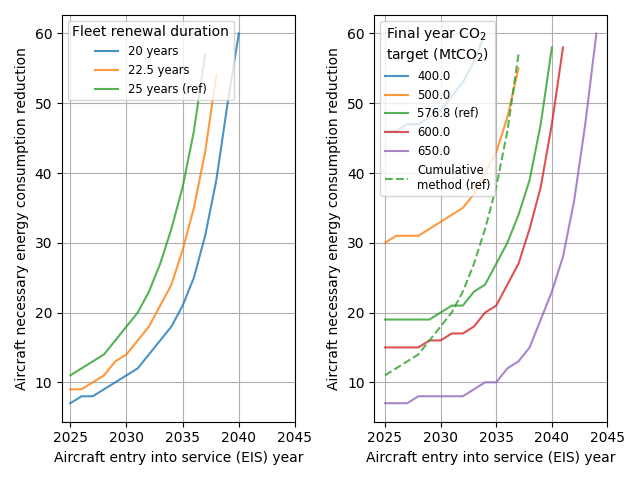

In [151]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots(1,2)
df_final.rename(columns={'25 years':'25 years (ref)'}).plot(ax=ax[0], linewidth=1.5, alpha=0.8)
ax[0].set_ylabel('Aircraft necessary energy consumption reduction')
ax[0].set_xlabel('Aircraft entry into service (EIS) year')
ax[0].grid()
legend = ax[0].legend(fontsize='small')
legend.set_title("Fleet renewal duration")

df_fin_co2.rename(columns={576.8:'576.8 (ref)'}).plot(ax=ax[1], linewidth=1.5, alpha=0.8)

pd.DataFrame(df_final['25 years']).rename(columns={'25 years':'Cumulative\nmethod (ref)'}).plot(ax=ax[1], linewidth=1.5,linestyle='--', color='#2ca02c', alpha=0.8)
ax[1].set_ylabel('Aircraft necessary energy consumption reduction')
ax[1].set_xlabel('Aircraft entry into service (EIS) year')
ax[1].grid()
legend = ax[1].legend(fontsize='small')
legend.set_title("Final year CO$_2$\ntarget (MtCO$_2$)")

# Set the tick positions and labels
tick_positions = np.arange(2025, 2046, 5)
tick_labels = tick_positions.astype(str)

ax[0].set_xticks(tick_positions)
ax[0].set_xticklabels(tick_labels)
ax[1].set_xticks(tick_positions)
ax[1].set_xticklabels(tick_labels)

# Rotate the tick labels if desired
# plt.xticks(rotation=45)

plt.tight_layout()

## EIS perfo tradeoff --> Total Energy

In [159]:
twentyfive_years=pd.read_csv('25_years_energy.csv')

In [186]:
df_explo_energy=twentyfive_years.pivot(index='0',columns='1', values='2')

df_nrj=pd.DataFrame()

target=[int(0.9*396411357823452),int(0.95*396411357823452),int(1*396411357823452),int(1.05*396411357823452)]

for target in target:

    # Find closest value and corresponding column name for each year
    closest_values = []
    closest_columns = []


    threshold = 0.005*target  # Threshold for considering a value close to the target

    # Find closest value and corresponding column name for each year
    closest_values = []
    closest_columns = []

    for _, row in df_explo_energy.iterrows():
        closest_value = min(row[0:], key=lambda x: abs(x - target))
        if closest_value - target > threshold:
            closest_value = np.nan
            closest_column = np.nan
        else:
            closest_column = df_explo_energy.columns[row.tolist().index(closest_value)]
        closest_values.append(closest_value)
        closest_columns.append(closest_column)
    
    df_explo_energy['Closest Value'] = closest_values
    df_explo_energy['Closest Column'] = closest_columns
    
    df_nrj[int(target/1e12)]=df_explo_energy['Closest Column']
    

In [192]:
df_explo_energy

1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,Closest Value,Closest Column
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2025,4.046838e+14,4.024437e+14,4.002036e+14,3.979634e+14,3.957233e+14,3.934832e+14,3.912431e+14,3.890030e+14,3.867629e+14,3.845228e+14,3.822826e+14,3.800425e+14,3.778024e+14,3.755623e+14,3.733222e+14,3.710821e+14,3.688420e+14,3.666019e+14,3.643617e+14,3.621216e+14,3.598815e+14,3.576414e+14,3.554013e+14,3.531612e+14,3.509211e+14,3.486809e+14,3.464408e+14,3.442007e+14,3.419606e+14,3.397205e+14,3.374804e+14,3.352403e+14,3.330002e+14,3.307600e+14,3.285199e+14,3.262798e+14,3.240397e+14,3.217996e+14,3.195595e+14,3.173194e+14,3.150793e+14,3.128391e+14,3.105990e+14,3.083589e+14,3.061188e+14,3.038787e+14,3.016386e+14,2.993985e+14,2.971584e+14,2.949182e+14,2.926781e+14,2.904380e+14,2.881979e+14,2.859578e+14,2.837177e+14,2.814776e+14,2.792375e+14,2.769973e+14,2.747572e+14,2.725171e+14,2.702770e+14,4.046838e+14,0
2026,4.046838e+14,4.025732e+14,4.004625e+14,3.983519e+14,3.962413e+14,3.941306e+14,3.920200e+14,3.899094e+14,3.877987e+14,3.856881e+14,3.835775e+14,3.814668e+14,3.793562e+14,3.772456e+14,3.751350e+14,3.730243e+14,3.709137e+14,3.688031e+14,3.666924e+14,3.645818e+14,3.624712e+14,3.603605e+14,3.582499e+14,3.561393e+14,3.540286e+14,3.519180e+14,3.498074e+14,3.476968e+14,3.455861e+14,3.434755e+14,3.413649e+14,3.392542e+14,3.371436e+14,3.350330e+14,3.329223e+14,3.308117e+14,3.287011e+14,3.265905e+14,3.244798e+14,3.223692e+14,3.202586e+14,3.181479e+14,3.160373e+14,3.139267e+14,3.118160e+14,3.097054e+14,3.075948e+14,3.054842e+14,3.033735e+14,3.012629e+14,2.991523e+14,2.970416e+14,2.949310e+14,2.928204e+14,2.907097e+14,2.885991e+14,2.864885e+14,2.843779e+14,2.822672e+14,2.801566e+14,2.780460e+14,4.046838e+14,0
2027,4.046838e+14,4.027049e+14,4.007261e+14,3.987472e+14,3.967683e+14,3.947895e+14,3.928106e+14,3.908317e+14,3.888529e+14,3.868740e+14,3.848951e+14,3.829163e+14,3.809374e+14,3.789585e+14,3.769797e+14,3.750008e+14,3.730220e+14,3.710431e+14,3.690642e+14,3.670854e+14,3.651065e+14,3.631276e+14,3.611488e+14,3.591699e+14,3.571910e+14,3.552122e+14,3.532333e+14,3.512545e+14,3.492756e+14,3.472967e+14,3.453179e+14,3.433390e+14,3.413601e+14,3.393813e+14,3.374024e+14,3.354235e+14,3.334447e+14,3.314658e+14,3.294869e+14,3.275081e+14,3.255292e+14,3.235504e+14,3.215715e+14,3.195926e+14,3.176138e+14,3.156349e+14,3.136560e+14,3.116772e+14,3.096983e+14,3.077194e+14,3.057406e+14,3.037617e+14,3.017829e+14,2.998040e+14,2.978251e+14,2.958463e+14,2.938674e+14,2.918885e+14,2.899097e+14,2.879308e+14,2.859520e+14,4.046838e+14,0
2028,4.046838e+14,4.028388e+14,4.009938e+14,3.991488e+14,3.973038e+14,3.954588e+14,3.936139e+14,3.917689e+14,3.899239e+14,3.880789e+14,3.862339e+14,3.843889e+14,3.825439e+14,3.806989e+14,3.788539e+14,3.770089e+14,3.751640e+14,3.733190e+14,3.714740e+14,3.696290e+14,3.677840e+14,3.659390e+14,3.640940e+14,3.622490e+14,3.604040e+14,3.585591e+14,3.567141e+14,3.548691e+14,3.530241e+14,3.511791e+14,3.493341e+14,3.474891e+14,3.456441e+14,3.437991e+14,3.419542e+14,3.401092e+14,3.382642e+14,3.364192e+14,3.345742e+14,3.327292e+14,3.308842e+14,3.290392e+14,3.271943e+14,3.253493e+14,3.235043e+14,3.216593e+14,3.198143e+14,3.179693e+14,3.161243e+14,3.142793e+14,3.124343e+14,3.105894e+14,3.087444e+14,3.068994e+14,3.050544e+14,3.032094e+14,3.013644e+14,2.995194e+14,2.976744e+14,2.958295e+14,2.939845e+14,4.046838e+14,0
2029,4.046838e+14,4.029745e+14,4.012653e+14,3.995561e+14,3.978468e+14,3.961376e+14,3.944284e+14,3.927191e+14,3.910099e+14,3.893007e+14,3.875914e+14,3.858822e+14,3.841730e+14,3.824637e+14,3.807545e+14,3.790452e+14,3.773360e+14,3.756268e+14,3.739175e+14,3.722083e+14,3.704991e+14,3.687898e+14,3.670806e+14,3.653714e+14,3.636621e+14,3.619529e+14,3.602437e+14,3.585344e+14,3.568252e+14,3.551159e+14,3.534067e+14,3.516975e+14,3.499882e+14,3.482790e+14,3.465698e+14,3.448605e+14,3.4315

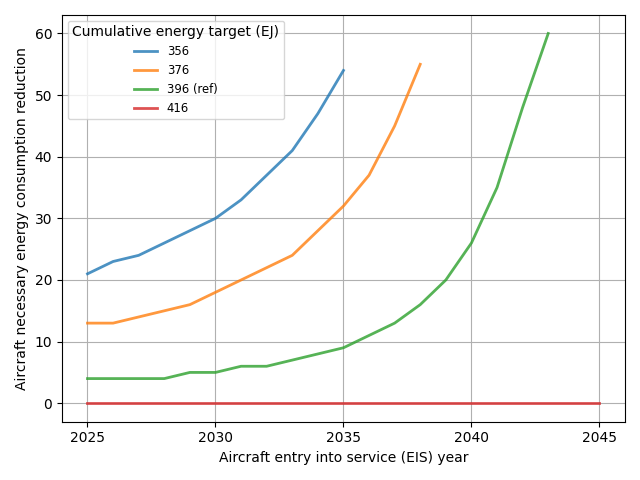

In [190]:
import matplotlib.pyplot as plt
fig, ax =plt.subplots()
df_nrj.rename(columns={396:'396 (ref)'}).plot(ax=ax, linewidth=2, alpha=0.8)
ax.set_ylabel('Aircraft necessary energy consumption reduction')
ax.set_xlabel('Aircraft entry into service (EIS) year')
ax.grid()

legend = ax.legend(fontsize='small')
legend.set_title("Cumulative energy target (EJ)")

# Set the tick positions and labels
tick_positions = np.arange(2025, 2046, 5)
tick_labels = tick_positions.astype(str)


ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

# Rotate the tick labels if desired
# plt.xticks(rotation=45)

plt.tight_layout()

## Cost Calaculation

In [ ]:
categories = list(fleet_model.fleet.categories.values())


aircraft_ask_dict={}

for i, category in enumerate(categories):
    for j, subcategory in category.subcategories.items():
        for aircraft in subcategory.aircraft.values():
            var_name = (
                        category.name
                        + ":"
                        + subcategory.name
                        + ":"
                        + aircraft.name
                        + ":aircraft_share"
                    )
            
            if category.name == 'Short Range':
                ask=fleet_model.df[var_name]/100*process.data['vector_outputs'].ask_short_range
            elif category.name == 'Medium Range':
                ask=fleet_model.df[var_name]/100*process.data['vector_outputs'].ask_medium_range
            elif category.name == 'Long Range':
                ask=fleet_model.df[var_name]/100*process.data['vector_outputs'].ask_long_range
            else:
                print('wtf')
                
            aircraft_ask_dict[aircraft.name]=ask


# adding by hand old aircaft
# old sr
aircraft_ask_dict['SR conventional narrow-body - Old']=fleet_model.df["Short Range:SR conventional narrow-body:old_reference:aircraft_share"]/100*process.data['vector_outputs'].ask_short_range
aircraft_ask_dict['SR conventional narrow-body - Recent']=fleet_model.df["Short Range:SR conventional narrow-body:recent_reference:aircraft_share"]/100*process.data['vector_outputs'].ask_short_range
aircraft_ask_dict['MR conventional narrow-body - Old']=fleet_model.df["Medium Range:MR conventional narrow-body:old_reference:aircraft_share"]/100*process.data['vector_outputs'].ask_medium_range
aircraft_ask_dict['MR conventional narrow-body - Recent']=fleet_model.df["Medium Range:MR conventional narrow-body:recent_reference:aircraft_share"]/100*process.data['vector_outputs'].ask_medium_range
aircraft_ask_dict['LR conventional narrow-body - Old']=fleet_model.df["Long Range:LR conventional wide-body:old_reference:aircraft_share"]/100*process.data['vector_outputs'].ask_long_range
aircraft_ask_dict['LR conventional narrow-body - Recent']=fleet_model.df["Long Range:LR conventional wide-body:recent_reference:aircraft_share"]/100*process.data['vector_outputs'].ask_long_range



ask_per_ac=406986332

In [ ]:
ask_df=pd.DataFrame(aircraft_ask_dict)

In [ ]:
n_aircraft_df=ask_df/ask_per_ac

In [ ]:
n_aircraft_df.plot.area()


In [ ]:
ask_doc=ask_df.copy()

ask_df['SR conventional narrow-body']=ask_df['SR conventional narrow-body - Old']+ask_df['SR conventional narrow-body - Recent']
ask_df.drop(columns={'SR conventional narrow-body - Old','SR conventional narrow-body - Recent'}, inplace=True)

ask_df['MR conventional narrow-body']=ask_df['MR conventional narrow-body - Old']+ask_df['MR conventional narrow-body - Recent']
ask_df.drop(columns={'MR conventional narrow-body - Old','MR conventional narrow-body - Recent'}, inplace=True)

ask_df['LR conventional narrow-body']=ask_df['LR conventional narrow-body - Old']+ask_df['LR conventional narrow-body - Recent']
ask_df.drop(columns={'LR conventional narrow-body - Old','LR conventional narrow-body - Recent'}, inplace=True)

In [ ]:
import numpy as np

def compute_existing_availability(
        ask_aircraft_type: pd.Series = pd.Series(dtype="float64"),
        ask_per_aircraft_aircraft_type: float = 1.0,
        n_years_prod: float = 0.0,
        life_aircraft_type: float = 0.0,
        prod_cagr: float =0.0,
):

    n_aircraft_t0 = ask_aircraft_type[2025]/ask_per_aircraft_aircraft_type

    indexes = ask_aircraft_type.index

    # Additional aircraft to be built per year
    aircraft_available_scenario = pd.Series(np.zeros(len(indexes)), indexes)
    aircraft_building_scenario = pd.Series(np.zeros(len(indexes)), indexes)

    x_0= n_aircraft_t0/((1-(1+prod_cagr)**n_years_prod)/(-prod_cagr))

    for i in range (0,n_years_prod):
        aircraft_building_scenario[2025-n_years_prod+i]=np.ceil(x_0*(1+prod_cagr)**i)
        for j in range (2025-n_years_prod+i, 2025+life_aircraft_type-n_years_prod+i):
            aircraft_available_scenario[j+1] +=np.ceil(x_0*(1+prod_cagr)**i)    
        
    return(
        pd.Series(aircraft_building_scenario),
        pd.Series(aircraft_available_scenario)
    )



def compute_aircraft_production(
        aircraft_available_scenario: pd.Series = pd.Series(dtype="float64"),
        aircraft_building_scenario: pd.Series = pd.Series(dtype="float64"),
        ask_aircraft_type: pd.Series = pd.Series(dtype="float64"),
        ask_per_aircraft_aircraft_type: float = 1.0,
        life_aircraft_type: float = 0.0,
):

    #define the aircraft demand scenario:
    # compute the number of aircraft to match the ask of the aircraft type, round to sup
    demand_scenario=np.ceil(ask_aircraft_type/ask_per_aircraft_aircraft_type)


    indexes = demand_scenario.index


    # For each year of the demand scenario the demand is matched by the production
    for year in range(2025,2050):
        # Aircraft missing in year n+1 must be supplied by aircraft built in year n
        if aircraft_available_scenario[year + 1] < demand_scenario[year + 1]:
            
            # print(year, aircraft_available_scenario[year + 1] - demand_scenario[year + 1])
            # Getting the necessary production
            missing_production = demand_scenario[year + 1] - aircraft_available_scenario[year + 1]
            aircraft_building_scenario[year] = missing_production
            # When new aircraft availability ends: either at the end of plant life or the end of the scenario;
            end_bound = min(list(demand_scenario.index)[-1], year + life_aircraft_type)
            # Adding new plant production to future years and computing total cost associated
            for i in range(year + 1, end_bound + 1):
                aircraft_available_scenario[i] = aircraft_available_scenario[i] + missing_production


    return(
        pd.Series(aircraft_building_scenario),
        pd.Series(aircraft_available_scenario)
    )

In [ ]:
# compute_existing_availability(aircraft_ask_dict['SR conventional narrow-body - Recent'],406986332, 20, 25, 0.04)[1]

In [ ]:
production_df=ask_df.apply(lambda col: compute_aircraft_production(compute_existing_availability(col, 406986332, 25, 25, 0.03)[1],compute_existing_availability(col, 406986332, 25, 25, 0.03)[0], col, 406986332, 26)[0], axis=0)
availability_df=ask_df.apply(lambda col: compute_aircraft_production(compute_existing_availability(col, 406986332, 25, 25, 0.03)[1],compute_existing_availability(col, 406986332, 25, 25, 0.03)[0], col, 406986332, 26)[1], axis=0)

In [ ]:
# compute_aircraft_production(compute_existing_availability(aircraft_ask_dict['SR conventional narrow-body - Recent'], 406986332, 20, 25, 0.04)[1],compute_existing_availability(aircraft_ask_dict['SR conventional narrow-body - Recent'], 406986332, 20, 25, 0.04)[0], aircraft_ask_dict['SR conventional narrow-body - Recent'], 406986332, 25)

In [ ]:
production_df.loc[2020:2049].plot.area()

In [ ]:
availability_df.loc[2025:2049].plot.area()

### NRC 

In [ ]:
def compute_nrc(
        nrc_tot_aircraft_type: float=0.0,
        development_time_aircraft_type: float=0.0,
        aircraft_building_scenario: pd.Series = pd.Series(dtype="float64"),
):
    costs = []
    years=[]
    sigma = development_time_aircraft_type / 6.0  # Controls the spread of the distribution
    
    
    nrc_distributed = pd.Series(np.zeros(len(aircraft_building_scenario.index)), aircraft_building_scenario.index)
    
    entry_into_service_year=aircraft_building_scenario.ne(0).idxmax()

    for i in range(1, development_time_aircraft_type + 1):
        year=entry_into_service_year-development_time_aircraft_type+i
        weight = np.exp(-0.5 * ((i - development_time_aircraft_type/2) / sigma) ** 2)
        cost = round(nrc_tot_aircraft_type * weight)
        costs.append(cost)
        years.append(year)

    # Adjust the distributed costs to ensure their sum matches the total cost
    total_distributed_cost = sum(costs)
    scaling_factor = nrc_tot_aircraft_type / total_distributed_cost
    costs = [round(cost * scaling_factor) for cost in costs]
    nrc_distributed = pd.Series(costs, index =years)

    return nrc_distributed




In [ ]:
production_df['New Short-range Narrow-body 1: NRC']=compute_nrc(10e9,7,production_df['New Short-range Narrow-body 1'])
production_df['New Short-range hydrogen: NRC']=compute_nrc(20e9,10,production_df['New Short-range hydrogen'])
production_df['New Medium-range narrow-body 1: NRC']=compute_nrc(10e9,7,production_df['New Medium-range narrow-body 1'])
production_df['New Long-range wide-body 1: NRC']=compute_nrc(20e9,7,production_df['New Long-range wide-body 1'])

## RC

In [ ]:
production_df['New Short-range Narrow-body 1: RC']=production_df['New Short-range Narrow-body 1']*50e6
production_df['SR conventional narrow-body: RC']=production_df['SR conventional narrow-body']*50e6
production_df['SR conventional narrow-body: RC']=production_df['SR conventional narrow-body']*50e6
production_df['New Short-range hydrogen: RC']=production_df['New Short-range hydrogen']*70e6


production_df['New Medium-range narrow-body 1: RC']=production_df['New Medium-range narrow-body 1']*60e6
production_df['MR conventional narrow-body: RC']=production_df['MR conventional narrow-body']*60e6
production_df['MR conventional narrow-body: RC']=production_df['MR conventional narrow-body']*60e6


production_df['New Long-range wide-body 1: RC']=production_df['New Long-range wide-body 1']*120e6
production_df['LR conventional narrow-body: RC']=production_df['LR conventional narrow-body']*120e6
production_df['LR conventional narrow-body: RC']=production_df['LR conventional narrow-body']*120e6

## DOC

In [ ]:
def compute_dropin_doc(
        energy_ask_aircraft_type,
):
    fuel_lhv = 35.3
    doc_bio = energy_ask_aircraft_type * (process.data['vector_outputs'].biofuel_hefa_fog_mfsp * process.data['vector_outputs'].biofuel_hefa_fog_share/100+
                                          process.data['vector_outputs'].biofuel_hefa_others_mfsp * process.data['vector_outputs'].biofuel_hefa_others_share/100+
                                          process.data['vector_outputs'].biofuel_atj_mfsp * process.data['vector_outputs'].biofuel_atj_share/100+
                                          process.data['vector_outputs'].biofuel_ft_msw_mfsp * process.data['vector_outputs'].biofuel_ft_msw_share/100+
                                          process.data['vector_outputs'].biofuel_ft_others_share/100*process.data['vector_outputs'].biofuel_ft_others_mfsp) * process.data['vector_outputs'].biofuel_share/100 / fuel_lhv
    doc_efuel = energy_ask_aircraft_type * process.data['vector_outputs'].electrofuel_avg_cost_per_l * process.data['vector_outputs'].electrofuel_share/100 /fuel_lhv
    doc_kerosene = energy_ask_aircraft_type * process.data['vector_outputs'].kerosene_market_price * process.data['vector_outputs'].kerosene_share/100 /fuel_lhv

    doc_energy_aircraft_type_ask=doc_kerosene.fillna(0)+doc_efuel.fillna(0)+doc_bio.fillna(0)

    return (
        doc_energy_aircraft_type_ask
    )



def compute_lh2_doc(
        energy_ask_aircraft_type
):
    hydrogen_specific_energy = 119.93  # MJ/kg

    doc_energy_aircraft_type_ask = energy_ask_aircraft_type * process.data['vector_outputs'].h2_avg_cost_per_kg_electrolysis / hydrogen_specific_energy

    return (
        doc_energy_aircraft_type_ask
    )


In [ ]:
energy_ask_type={}

old_SR_e_ask=110.8/73.2*0.824
recent_SR_e_ask=84.2/73.2*0.824

old_MR_e_ask=81.4/73.2*0.824
recent_MR_e_ask=62/73.2*0.824

old_LR_e_ask=96.65/73.2*0.824
recent_LR_e_ask=73.45/73.2*0.824


for i, category in enumerate(categories):
    for j, subcategory in category.subcategories.items():
        for aircraft in subcategory.aircraft.values():
            var_name = (
                        aircraft.name
                        + ": DOC_energy_ask"
                    )
            aircraft.parameters.

            if category.name=='Short Range':
                energy_ask_type[var_name]=(1-float(aircraft.parameters.consumption_gain)/100)*recent_SR_e_ask
            elif category.name=='Medium Range':
                energy_ask_type[var_name]=(1-float(aircraft.parameters.consumption_gain)/100)*recent_MR_e_ask
            else:
                energy_ask_type[var_name]=(1-float(aircraft.parameters.consumption_gain)/100)*recent_LR_e_ask

In [ ]:
energy_ask_type

In [ ]:
ask_doc['New Short-range Narrow-body 1: DOC_energy_ask']=compute_dropin_doc(energy_ask_type['New Short-range Narrow-body 1: DOC_energy_ask'])
ask_doc['SR conventional narrow-body - Old: DOC_energy_ask']=compute_dropin_doc(old_SR_e_ask) ## -> calib directe
ask_doc['SR conventional narrow-body - Recent: DOC_energy_ask']=compute_dropin_doc(recent_SR_e_ask) ## -> calib directe
ask_doc['New Short-range hydrogen: DOC_energy_ask']=compute_lh2_doc(energy_ask_type['New Short-range hydrogen: DOC_energy_ask'])


ask_doc['New Medium-range narrow-body 1: DOC_energy_ask']=compute_dropin_doc(energy_ask_type['New Short-range Narrow-body 1: DOC_energy_ask'])
ask_doc['MR conventional narrow-body - Old: DOC_energy_ask']=compute_dropin_doc(old_MR_e_ask)
ask_doc['MR conventional narrow-body - Recent: DOC_energy_ask']=compute_dropin_doc(recent_MR_e_ask)

ask_doc['New Long-range wide-body 1: DOC_energy_ask']=compute_dropin_doc(energy_ask_type['New Long-range wide-body 1: DOC_energy_ask'])
ask_doc['LR conventional narrow-body - Old: DOC_energy_ask']=compute_dropin_doc(old_LR_e_ask)
ask_doc['LR conventional narrow-body - Recent: DOC_energy_ask']=compute_dropin_doc(recent_LR_e_ask)

In [ ]:
ask_doc['New Short-range Narrow-body 1: DOC_energy']=ask_doc['New Short-range Narrow-body 1']*ask_doc['New Short-range Narrow-body 1: DOC_energy_ask']
ask_doc['SR conventional narrow-body - Old: DOC_energy']=ask_doc['SR conventional narrow-body - Old']*ask_doc['SR conventional narrow-body - Old: DOC_energy_ask']
ask_doc['SR conventional narrow-body - Recent: DOC_energy']=ask_doc['SR conventional narrow-body - Recent']*ask_doc['SR conventional narrow-body - Recent: DOC_energy_ask']
ask_doc['New Short-range hydrogen: DOC_energy']=ask_doc['New Short-range hydrogen']*ask_doc['New Short-range hydrogen: DOC_energy_ask']


ask_doc['New Medium-range narrow-body 1: DOC_energy']=ask_doc['New Medium-range narrow-body 1']*ask_doc['New Medium-range narrow-body 1: DOC_energy_ask']
ask_doc['MR conventional narrow-body - Old: DOC_energy']=ask_doc['MR conventional narrow-body - Old']*ask_doc['MR conventional narrow-body - Old: DOC_energy_ask']
ask_doc['MR conventional narrow-body - Recent: DOC_energy']=ask_doc['MR conventional narrow-body - Recent']*ask_doc['MR conventional narrow-body - Recent: DOC_energy_ask']

ask_doc['New Long-range wide-body 1: DOC_energy']=ask_doc['New Long-range wide-body 1']*ask_doc['New Long-range wide-body 1: DOC_energy_ask']
ask_doc['LR conventional narrow-body - Old: DOC_energy']=ask_doc['LR conventional narrow-body - Old']*ask_doc['LR conventional narrow-body - Old: DOC_energy_ask']
ask_doc['LR conventional narrow-body - Recent: DOC_energy']=ask_doc['LR conventional narrow-body - Recent']*ask_doc['LR conventional narrow-body - Recent: DOC_energy_ask']

In [ ]:
ask_doc

In [ ]:
ask_doc['New Short-range Narrow-body 1: DOC_non_energy']=ask_doc['New Short-range Narrow-body 1']*0.04+0.005
ask_doc['SR conventional narrow-body - Old: DOC_non_energy']=ask_doc['SR conventional narrow-body - Old']*0.04+0.005
ask_doc['SR conventional narrow-body - Recent: DOC_non_energy']=ask_doc['SR conventional narrow-body - Recent']*0.04+0.005
ask_doc['New Short-range hydrogen: DOC_non_energy']=ask_doc['New Short-range hydrogen']*0.05+0.006


ask_doc['New Medium-range narrow-body 1: DOC_non_energy']=ask_doc['New Medium-range narrow-body 1']*0.025+0.003
ask_doc['MR conventional narrow-body - Old: DOC_non_energy']=ask_doc['MR conventional narrow-body - Old']*0.025+0.003
ask_doc['MR conventional narrow-body - Recent: DOC_non_energy']=ask_doc['MR conventional narrow-body - Recent']*0.025+0.003

ask_doc['New Long-range wide-body 1: DOC_non_energy']=ask_doc['New Long-range wide-body 1']*0.02+0.003
ask_doc['LR conventional narrow-body - Old: DOC_non_energy']=ask_doc['LR conventional narrow-body - Old']*0.02+0.003
ask_doc['LR conventional narrow-body - Recent: DOC_non_energy']=ask_doc['LR conventional narrow-body - Recent']*0.02+0.003

In [ ]:
ask_doc['SR Average DOC_ask']= (ask_doc['New Short-range Narrow-body 1: DOC_non_energy']+
                               ask_doc['SR conventional narrow-body - Old: DOC_non_energy']+
                               ask_doc['SR conventional narrow-body - Recent: DOC_non_energy']+
                               ask_doc['New Short-range hydrogen: DOC_non_energy'].fillna(0)+
                               ask_doc['New Short-range Narrow-body 1: DOC_energy']+
                               ask_doc['SR conventional narrow-body - Old: DOC_energy']+
                               ask_doc['SR conventional narrow-body - Recent: DOC_energy']+
                               ask_doc['New Short-range hydrogen: DOC_energy'].fillna(0))/process.data['vector_outputs'].ask_short_range


ask_doc['MR Average DOC_ask']=(ask_doc['New Medium-range narrow-body 1: DOC_energy']+
                              ask_doc['MR conventional narrow-body - Old: DOC_energy']+
                              ask_doc['MR conventional narrow-body - Recent: DOC_energy']+
                              ask_doc['New Medium-range narrow-body 1: DOC_non_energy']+
                              ask_doc['MR conventional narrow-body - Old: DOC_non_energy']+
                              ask_doc['MR conventional narrow-body - Recent: DOC_non_energy'])/process.data['vector_outputs'].ask_medium_range


ask_doc['LR Average DOC_ask']=(ask_doc['New Long-range wide-body 1: DOC_energy']+
                              ask_doc['LR conventional narrow-body - Old: DOC_energy']+
                              ask_doc['LR conventional narrow-body - Recent: DOC_energy']+
                              ask_doc['New Long-range wide-body 1: DOC_non_energy']+
                              ask_doc['LR conventional narrow-body - Old: DOC_non_energy']+
                              ask_doc['LR conventional narrow-body - Recent: DOC_non_energy'])/process.data['vector_outputs'].ask_long_range

In [ ]:
pd.DataFrame([ask_doc['SR Average DOC_ask'],ask_doc['LR Average DOC_ask'],ask_doc['MR Average DOC_ask']]).transpose().plot()

In [ ]:
energy_ask_type